## Import statements

In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

from tensorflow.keras.callbacks import EarlyStopping

from sklearn.metrics import classification_report, confusion_matrix

## Import Data

In [2]:
df = pd.read_csv('TensorFlow_FILES/DATA/cancer_classification.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [4]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
mean radius,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
mean texture,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
mean perimeter,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
mean area,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
mean smoothness,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
mean compactness,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
mean concavity,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
mean concave points,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
mean symmetry,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
mean fractal dimension,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


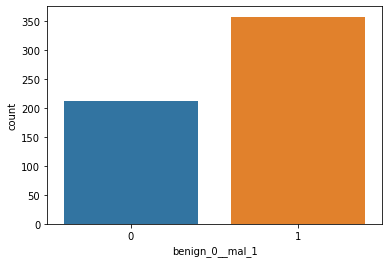

In [5]:
sns.countplot(x='benign_0__mal_1', data = df)

## EDA

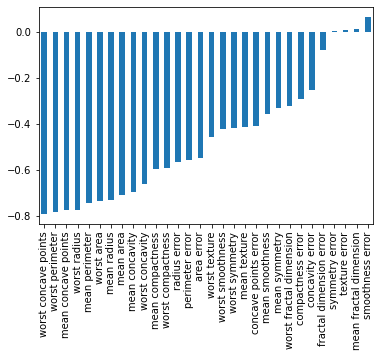

In [9]:
df.corr()['benign_0__mal_1'][:-1].sort_values().plot(kind = 'bar')

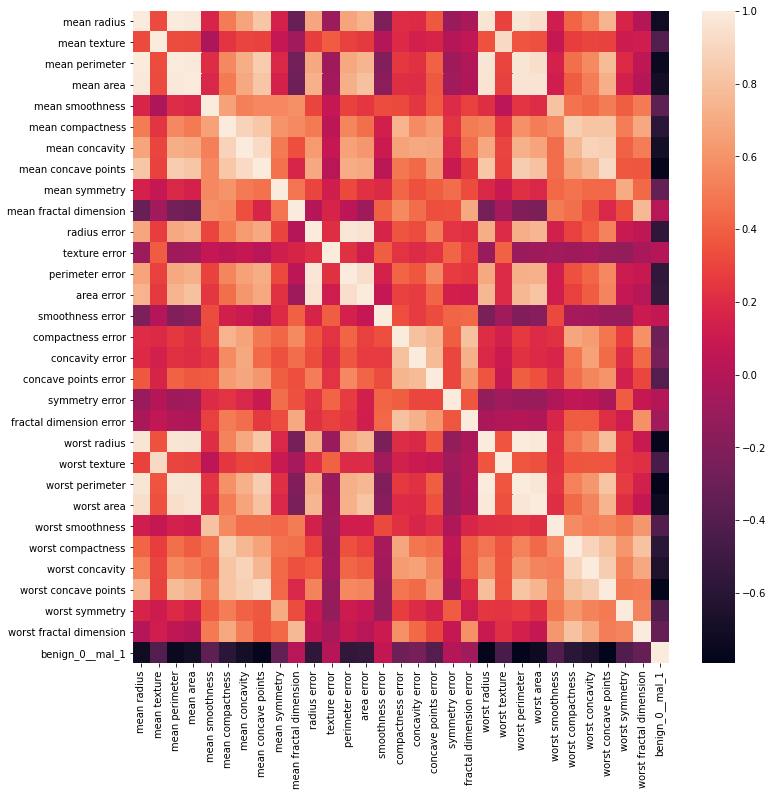

In [11]:
plt.figure(figsize = (12,12))
sns.heatmap(df.corr())

## Train test split

In [12]:
X = df.drop('benign_0__mal_1', axis = 1).values
y= df['benign_0__mal_1'].values

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)

In [16]:
scaler = MinMaxScaler()

In [17]:
X_train = scaler.fit_transform(X_train)

In [18]:
X_test = scaler.transform(X_test)

## Model

In [20]:
X_train.shape

(426, 30)

In [22]:
model = Sequential()

model.add(Dense(30, activation = 'relu'))

model.add(Dense(15, activation = 'relu'))

# BINARY CLASSIFICATION
model.add(Dense(1, activation = 'sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam')

Instructions for updating:
Colocations handled automatically by placer.


In [23]:
model.fit(x=X_train, y=y_train, epochs =600, validation_data=(X_test, y_test))

Train on 426 samples, validate on 143 samples
Instructions for updating:
Use tf.cast instead.
Epoch 1/600
426/426 [==============================] - 0s 796us/sample - loss: 0.6740 - val_loss: 0.6620
Epoch 2/600
426/426 [==============================] - 0s 53us/sample - loss: 0.6425 - val_loss: 0.6274
Epoch 3/600
426/426 [==============================] - 0s 41us/sample - loss: 0.6061 - val_loss: 0.5912
Epoch 4/600
426/426 [==============================] - 0s 43us/sample - loss: 0.5701 - val_loss: 0.5546
Epoch 5/600
426/426 [==============================] - 0s 45us/sample - loss: 0.5334 - val_loss: 0.5182
Epoch 6/600
426/426 [==============================] - 0s 49us/sample - loss: 0.4959 - val_loss: 0.4782
Epoch 7/600
426/426 [==============================] - 0s 47us/sample - loss: 0.4558 - val_loss: 0.4371
Epoch 8/600
426/426 [==============================] - 0s 47us/sample - loss: 0.4173 - val_loss: 0.3979
Epoch 9/600
426/426 [==============================] - 0s 49us/sample - l

426/426 [==============================] - 0s 43us/sample - loss: 0.0575 - val_loss: 0.1208
Epoch 77/600
426/426 [==============================] - 0s 46us/sample - loss: 0.0547 - val_loss: 0.1249
Epoch 78/600
426/426 [==============================] - 0s 46us/sample - loss: 0.0614 - val_loss: 0.1206
Epoch 79/600
426/426 [==============================] - 0s 45us/sample - loss: 0.0588 - val_loss: 0.1237
Epoch 80/600
426/426 [==============================] - 0s 45us/sample - loss: 0.0525 - val_loss: 0.1206
Epoch 81/600
426/426 [==============================] - 0s 43us/sample - loss: 0.0555 - val_loss: 0.1313
Epoch 82/600
426/426 [==============================] - 0s 43us/sample - loss: 0.0525 - val_loss: 0.1198
Epoch 83/600
426/426 [==============================] - 0s 43us/sample - loss: 0.0551 - val_loss: 0.1211
Epoch 84/600
426/426 [==============================] - 0s 42us/sample - loss: 0.0527 - val_loss: 0.1255
Epoch 85/600
426/426 [==============================] - 0s 43us/samp

426/426 [==============================] - 0s 49us/sample - loss: 0.0451 - val_loss: 0.1470
Epoch 154/600
426/426 [==============================] - 0s 50us/sample - loss: 0.0447 - val_loss: 0.1286
Epoch 155/600
426/426 [==============================] - 0s 50us/sample - loss: 0.0426 - val_loss: 0.1403
Epoch 156/600
426/426 [==============================] - 0s 50us/sample - loss: 0.0418 - val_loss: 0.1340
Epoch 157/600
426/426 [==============================] - 0s 51us/sample - loss: 0.0447 - val_loss: 0.1482
Epoch 158/600
426/426 [==============================] - 0s 52us/sample - loss: 0.0437 - val_loss: 0.1367
Epoch 159/600
426/426 [==============================] - 0s 49us/sample - loss: 0.0414 - val_loss: 0.1365
Epoch 160/600
426/426 [==============================] - 0s 50us/sample - loss: 0.0424 - val_loss: 0.1287
Epoch 161/600
426/426 [==============================] - 0s 49us/sample - loss: 0.0446 - val_loss: 0.1419
Epoch 162/600
426/426 [==============================] - 0s 

426/426 [==============================] - 0s 44us/sample - loss: 0.0369 - val_loss: 0.1378
Epoch 231/600
426/426 [==============================] - 0s 46us/sample - loss: 0.0440 - val_loss: 0.1410
Epoch 232/600
426/426 [==============================] - 0s 45us/sample - loss: 0.0419 - val_loss: 0.1589
Epoch 233/600
426/426 [==============================] - 0s 45us/sample - loss: 0.0385 - val_loss: 0.1465
Epoch 234/600
426/426 [==============================] - 0s 45us/sample - loss: 0.0397 - val_loss: 0.1562
Epoch 235/600
426/426 [==============================] - 0s 45us/sample - loss: 0.0372 - val_loss: 0.1475
Epoch 236/600
426/426 [==============================] - 0s 47us/sample - loss: 0.0353 - val_loss: 0.1588
Epoch 237/600
426/426 [==============================] - 0s 45us/sample - loss: 0.0367 - val_loss: 0.1392
Epoch 238/600
426/426 [==============================] - 0s 46us/sample - loss: 0.0408 - val_loss: 0.1754
Epoch 239/600
426/426 [==============================] - 0s 

426/426 [==============================] - 0s 44us/sample - loss: 0.0317 - val_loss: 0.1594
Epoch 308/600
426/426 [==============================] - 0s 48us/sample - loss: 0.0349 - val_loss: 0.1504
Epoch 309/600
426/426 [==============================] - 0s 43us/sample - loss: 0.0311 - val_loss: 0.1530
Epoch 310/600
426/426 [==============================] - 0s 43us/sample - loss: 0.0311 - val_loss: 0.1617
Epoch 311/600
426/426 [==============================] - 0s 44us/sample - loss: 0.0347 - val_loss: 0.1498
Epoch 312/600
426/426 [==============================] - 0s 44us/sample - loss: 0.0356 - val_loss: 0.1446
Epoch 313/600
426/426 [==============================] - 0s 48us/sample - loss: 0.0378 - val_loss: 0.1617
Epoch 314/600
426/426 [==============================] - 0s 49us/sample - loss: 0.0332 - val_loss: 0.1435
Epoch 315/600
426/426 [==============================] - 0s 51us/sample - loss: 0.0383 - val_loss: 0.1716
Epoch 316/600
426/426 [==============================] - 0s 

426/426 [==============================] - 0s 45us/sample - loss: 0.0390 - val_loss: 0.1627
Epoch 385/600
426/426 [==============================] - 0s 50us/sample - loss: 0.0276 - val_loss: 0.1582
Epoch 386/600
426/426 [==============================] - 0s 51us/sample - loss: 0.0285 - val_loss: 0.1660
Epoch 387/600
426/426 [==============================] - 0s 48us/sample - loss: 0.0277 - val_loss: 0.1607
Epoch 388/600
426/426 [==============================] - 0s 54us/sample - loss: 0.0264 - val_loss: 0.1564
Epoch 389/600
426/426 [==============================] - 0s 52us/sample - loss: 0.0265 - val_loss: 0.1562
Epoch 390/600
426/426 [==============================] - 0s 50us/sample - loss: 0.0266 - val_loss: 0.1589
Epoch 391/600
426/426 [==============================] - 0s 48us/sample - loss: 0.0275 - val_loss: 0.1603
Epoch 392/600
426/426 [==============================] - 0s 51us/sample - loss: 0.0292 - val_loss: 0.1607
Epoch 393/600
426/426 [==============================] - 0s 

426/426 [==============================] - 0s 47us/sample - loss: 0.0335 - val_loss: 0.2115
Epoch 462/600
426/426 [==============================] - 0s 49us/sample - loss: 0.0267 - val_loss: 0.1489
Epoch 463/600
426/426 [==============================] - 0s 45us/sample - loss: 0.0259 - val_loss: 0.1741
Epoch 464/600
426/426 [==============================] - 0s 47us/sample - loss: 0.0255 - val_loss: 0.1617
Epoch 465/600
426/426 [==============================] - 0s 45us/sample - loss: 0.0227 - val_loss: 0.1813
Epoch 466/600
426/426 [==============================] - 0s 45us/sample - loss: 0.0255 - val_loss: 0.1654
Epoch 467/600
426/426 [==============================] - 0s 45us/sample - loss: 0.0241 - val_loss: 0.1743
Epoch 468/600
426/426 [==============================] - 0s 45us/sample - loss: 0.0270 - val_loss: 0.1725
Epoch 469/600
426/426 [==============================] - 0s 46us/sample - loss: 0.0283 - val_loss: 0.1683
Epoch 470/600
426/426 [==============================] - 0s 

426/426 [==============================] - 0s 43us/sample - loss: 0.0249 - val_loss: 0.1619
Epoch 539/600
426/426 [==============================] - 0s 44us/sample - loss: 0.0211 - val_loss: 0.1951
Epoch 540/600
426/426 [==============================] - 0s 46us/sample - loss: 0.0206 - val_loss: 0.1542
Epoch 541/600
426/426 [==============================] - 0s 46us/sample - loss: 0.0218 - val_loss: 0.1963
Epoch 542/600
426/426 [==============================] - 0s 46us/sample - loss: 0.0267 - val_loss: 0.1570
Epoch 543/600
426/426 [==============================] - 0s 43us/sample - loss: 0.0216 - val_loss: 0.1747
Epoch 544/600
426/426 [==============================] - 0s 44us/sample - loss: 0.0206 - val_loss: 0.1736
Epoch 545/600
426/426 [==============================] - 0s 44us/sample - loss: 0.0282 - val_loss: 0.1599
Epoch 546/600
426/426 [==============================] - 0s 42us/sample - loss: 0.0243 - val_loss: 0.1915
Epoch 547/600
426/426 [==============================] - 0s 

In [25]:
losses = pd.DataFrame(model.history.history)

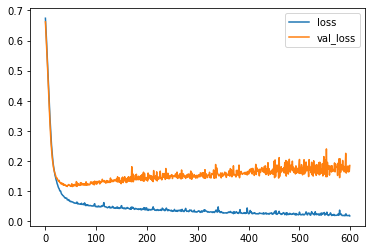

In [30]:
# Notice how the validation loss diverges form the training loss
# This is a hallmark characteristic of overfitting
losses.plot()

## Retraining using early stop

In [33]:
# help(EarlyStopping)

In [36]:
model = Sequential()

model.add(Dense(30, activation = 'relu'))

model.add(Dense(15, activation = 'relu'))

# BINARY CLASSIFICATION
model.add(Dense(1, activation = 'sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam')

In [35]:
early_stop = EarlyStopping(monitor = 'val_loss', mode = 'min', verbose = 1, patience = 25)

In [37]:
model.fit(x=X_train, y=y_train, epochs =600, validation_data=(X_test, y_test),
         callbacks=[early_stop])

Train on 426 samples, validate on 143 samples
Epoch 1/600
426/426 [==============================] - 0s 1ms/sample - loss: 0.6832 - val_loss: 0.6673
Epoch 2/600
426/426 [==============================] - 0s 53us/sample - loss: 0.6461 - val_loss: 0.6315
Epoch 3/600
426/426 [==============================] - 0s 52us/sample - loss: 0.6061 - val_loss: 0.5871
Epoch 4/600
426/426 [==============================] - 0s 56us/sample - loss: 0.5570 - val_loss: 0.5347
Epoch 5/600
426/426 [==============================] - 0s 59us/sample - loss: 0.4979 - val_loss: 0.4699
Epoch 6/600
426/426 [==============================] - 0s 59us/sample - loss: 0.4376 - val_loss: 0.4084
Epoch 7/600
426/426 [==============================] - 0s 53us/sample - loss: 0.3788 - val_loss: 0.3542
Epoch 8/600
426/426 [==============================] - 0s 55us/sample - loss: 0.3301 - val_loss: 0.3103
Epoch 9/600
426/426 [==============================] - 0s 55us/sample - loss: 0.2924 - val_loss: 0.2736
Epoch 10/600
426/42

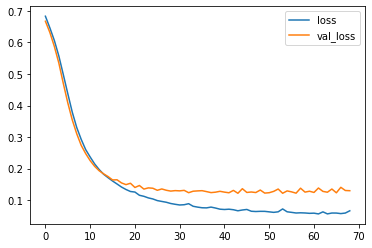

In [38]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

## Using Dropout layers

In [43]:
model = Sequential()

model.add(Dense(30, activation = 'relu'))
model.add(Dropout(0.5)) # Indicates that a random collection of half the neurons will turn off

model.add(Dense(15, activation = 'relu'))
model.add(Dropout(0.5)) # So, each neuron has a 50% chance of being turned off each epoch

# BINARY CLASSIFICATION
model.add(Dense(1, activation = 'sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam')

In [44]:
model.fit(x=X_train, y=y_train, epochs =600, validation_data=(X_test, y_test),
         callbacks=[early_stop])

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Train on 426 samples, validate on 143 samples
Epoch 1/600
426/426 [==============================] - 1s 1ms/sample - loss: 0.7139 - val_loss: 0.6739
Epoch 2/600
426/426 [==============================] - 0s 65us/sample - loss: 0.6881 - val_loss: 0.6575
Epoch 3/600
426/426 [==============================] - 0s 62us/sample - loss: 0.6756 - val_loss: 0.6456
Epoch 4/600
426/426 [==============================] - 0s 69us/sample - loss: 0.6542 - val_loss: 0.6326
Epoch 5/600
426/426 [==============================] - 0s 67us/sample - loss: 0.6357 - val_loss: 0.6160
Epoch 6/600
426/426 [==============================] - 0s 64us/sample - loss: 0.6307 - val_loss: 0.5992
Epoch 7/600
426/426 [==============================] - 0s 64us/sample - loss: 0.6168 - val_loss: 0.5807
Epoch 8/600
426/426 [==============================] - 0s 62us/sample - loss: 0.5848 - val_loss: 0.5583
Epoch 9/

426/426 [==============================] - 0s 62us/sample - loss: 0.1279 - val_loss: 0.0782
Epoch 76/600
426/426 [==============================] - 0s 62us/sample - loss: 0.1333 - val_loss: 0.0747
Epoch 77/600
426/426 [==============================] - 0s 73us/sample - loss: 0.1194 - val_loss: 0.0798
Epoch 78/600
426/426 [==============================] - 0s 63us/sample - loss: 0.1164 - val_loss: 0.0785
Epoch 79/600
426/426 [==============================] - 0s 63us/sample - loss: 0.1202 - val_loss: 0.0805
Epoch 80/600
426/426 [==============================] - 0s 61us/sample - loss: 0.1109 - val_loss: 0.0797
Epoch 81/600
426/426 [==============================] - 0s 65us/sample - loss: 0.1026 - val_loss: 0.0737
Epoch 82/600
426/426 [==============================] - 0s 65us/sample - loss: 0.1040 - val_loss: 0.0730
Epoch 83/600
426/426 [==============================] - 0s 62us/sample - loss: 0.1134 - val_loss: 0.0715
Epoch 84/600
426/426 [==============================] - 0s 62us/samp

426/426 [==============================] - 0s 59us/sample - loss: 0.0815 - val_loss: 0.0696
Epoch 153/600
426/426 [==============================] - 0s 56us/sample - loss: 0.0862 - val_loss: 0.0727
Epoch 00153: early stopping


In [45]:
model_loss = pd.DataFrame(model.history.history)

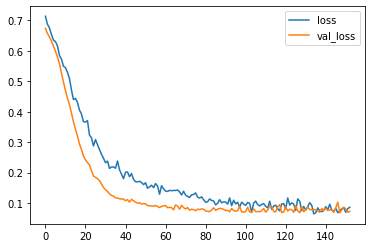

In [46]:
model_loss.plot()

## Evaluation

In [48]:
predictions = model.predict_classes(X_test)

In [51]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98        55
           1       0.99      0.99      0.99        88

    accuracy                           0.99       143
   macro avg       0.99      0.99      0.99       143
weighted avg       0.99      0.99      0.99       143



In [52]:
print(confusion_matrix(y_test, predictions))

[[54  1]
 [ 1 87]]
